In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sys
sys.path.append('../')
from utils import matplotlib_setup
from os.path import join
from collections import defaultdict
import pandas as pd
from glob import glob
%matplotlib inline


In [4]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
markers = ['>','*','<','o','^']
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12

In [5]:
def plot_bars(dt_bars, rf_bars, cnn_bars):
    
    matplotlib_setup( fontsize=35)

    # set width of bar
    barWidth = 0.15

    # Set position of bar on X axis
    r1 = np.arange(len( dt_bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    # Make the plot
    fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(18,6))
    ax.grid(linewidth=3,axis='y', color='grey')
    plt.bar(r1, dt_bars,  width=barWidth, edgecolor='white', label='Decision Tree', hatch=patterns[0])
    plt.bar(r2,  rf_bars, width=barWidth, edgecolor='white', label='Random Forest',hatch=patterns[1])
    plt.bar(r3,  cnn_bars,  width=barWidth, edgecolor='white', label='CNN',hatch=patterns[2])
 
    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len( dt_bars))], ['NS', 'FFS', 'SFS', 'SGS', 'SRS'])
    
    # Create legend & Show graphic
    plt.legend(ncol=3,fancybox=True, framealpha=0.3)
    plt.tight_layout()
    return plt

In [6]:
batch_sizes = [16,64,256,1024, 4096]
inference_times =np.array([
63538.50507,
26888.83943,
16541.77432,
14269.87075,
13756.47182])


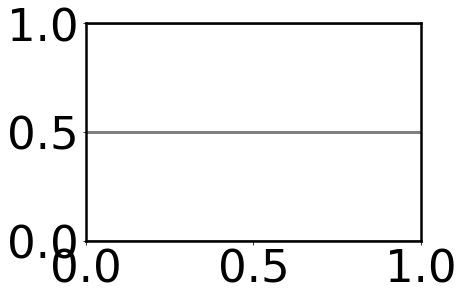

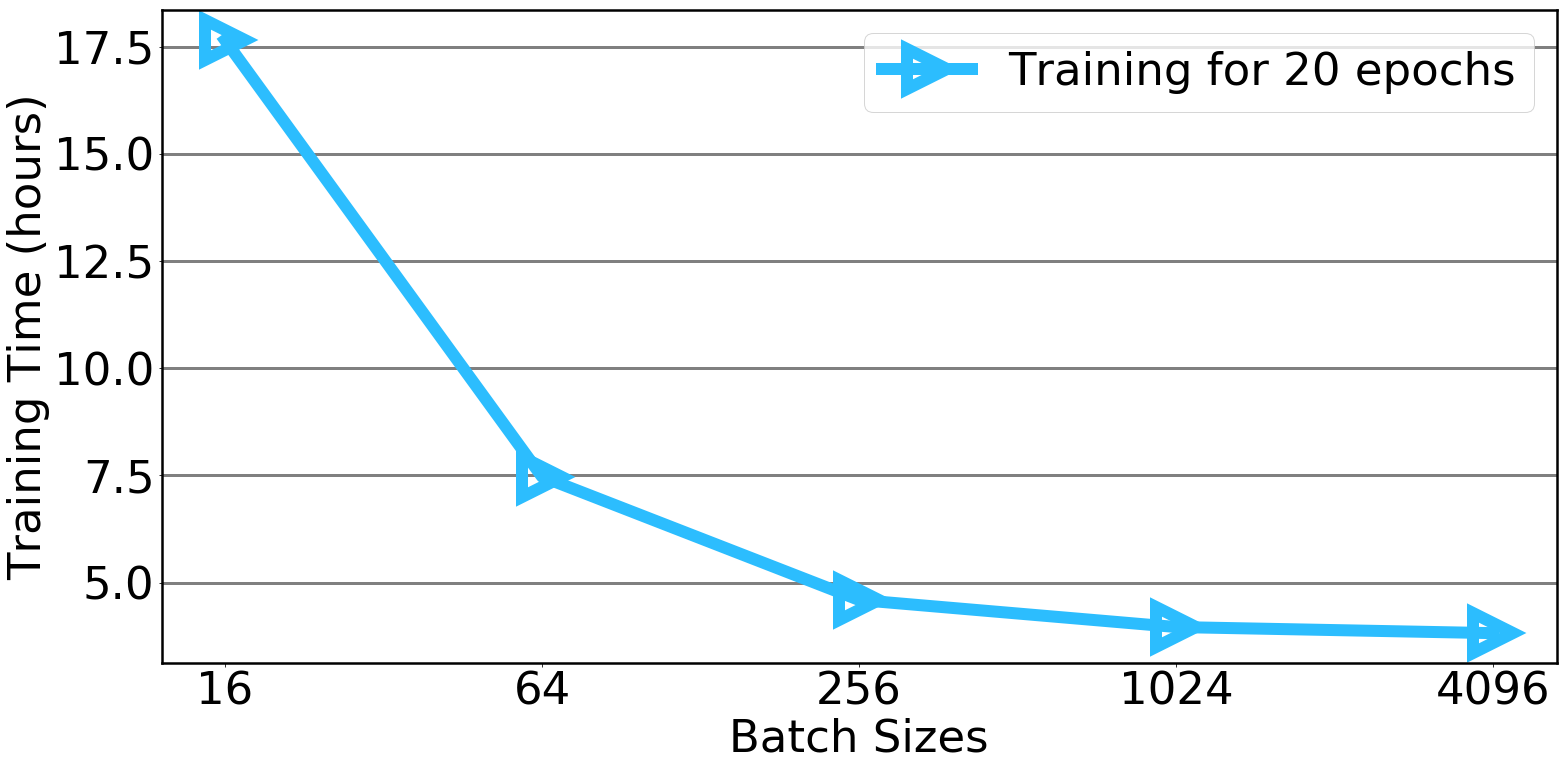

In [28]:
dataroot = '/data/juma/data/ids18'
x_indices = np.arange(len(batch_sizes))

matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
ax.plot(x_indices,inference_times/(60*60),label='Training for 20 epochs',linewidth=LINEWIDTH,marker=markers[0],markersize=MSIZE,\
        markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3,axis='y', color='grey')
plt.ylabel('Training Time (hours)')
plt.ylim()
#plt.plot(x_indices, inference_times, linewidth = 10,   label='Decision Tree')
plt.xticks(x_indices, batch_sizes)
plt.xlabel("Batch Sizes")
plt.legend()
plt.savefig(join(dataroot,'training_time_per_batch_size.png'))

In [26]:
import pandas as pd
drs = [95.39, 94.75, 90.55, 94.39, 94.51]
fars = [3.59, 3.4, 2.75, 2, 1.8]
df = pd.DataFrame({'bs':batch_sizes,'inference_times':inference_times, 'dr':drs,'far':fars})
df['inference_times'] = df['inference_times']/(60*60)
df

,bs,inference_times,dr,far
0,16,17.649585,95.39,3.59
1,64,7.469122,94.75,3.40
2,256,4.594937,90.55,2.75
3,1024,3.963853,94.39,2.00
4,4096,3.821242,94.51,1.80


In [9]:
%load_ext rpy2.ipython

In [29]:
%%R
install.packages('hrbrthemes')

R[write to console]: trying URL 'https://cran.seoul.go.kr/src/contrib/hrbrthemes_0.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2379836 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [123]:
%%R 
library (tibble)
library(dplyr)
library(forcats)
library(tidyr)
library(purrr)
library(psych)
library(stringr)
library(ggplot2)
library(viridis)
library(hrbrthemes)


THEME_DEFAULT <- theme_bw(
    base_size=10,
    base_family='Arial'
) +
theme(
    axis.title.x=element_text(colour="grey20",size=13,angle=0,hjust=.5,vjust=.5, face="bold"),
    axis.title.y=element_text(colour="grey20",size=13,angle=90,hjust=.5,vjust=1, face="bold"),
    axis.text.x=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    axis.text.y=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    strip.text.x=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.25, face="bold"),
    strip.text.y=element_text(colour="grey20",size=13,angle=270,hjust=.5,vjust=.5, face="bold"),
    legend.title=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.5,face="bold"),
    legend.position='top'
)

In [126]:
outfile = 'batch_size_effect_previous'

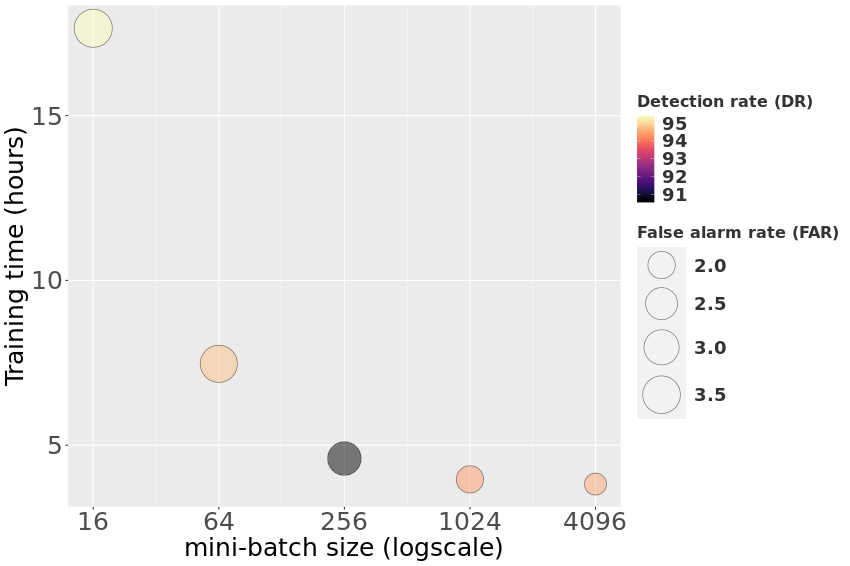

In [127]:
%%R -i df -i outfile  -w 30 -h 20 -u cm
library(ggsci) 
library(ggpubr)

p <- ggplot(data=df,aes(x=bs, y=inference_times, fill=dr, size=far)) +
    geom_point(alpha=0.5, shape=21, color="black") +
    scale_x_continuous(trans = 'log2',breaks=c(16,64,256,1024,4096), labels=c('16','64','256','1024','4096'))+
    scale_size_continuous(range=c(2*5,3.5*5), name='False alarm rate (FAR)' ) +
    scale_fill_viridis(discrete=FALSE, name="Detection rate (DR)",  option="A") +
    ylab("Training time (hours)") +
    xlab("mini-batch size (logscale)")+
    #theme_pubr()+
    theme(
        #panel.grid.major.y = element_line(size=0.25, linetype='solid', color='grey'),
        panel.grid.minor.y = element_line(size=0.01, linetype='solid', color='grey'),
        legend.title=element_text(colour="grey20", size=16, angle=0, hjust=.0, face='bold'),
        legend.text=element_text(colour="grey20", size=18, angle=0, hjust=.0, face='bold'),
        strip.text = element_text(size=25),
         axis.title = element_text(size=25),
        axis.text = element_text(size=25),
         )
print(p)
#ggsave(paste('./',outfile, '.eps', sep=''), plot=p, width=60, height=30, units='cm')
ggsave(paste('./',outfile, '.png', sep=''), p, width=30, height=20, units='cm', dpi=500)
#png(filename = paste('./',outfile, '.png', sep=''),plot=p,  width=60, height=30, units='cm', res=1200)   

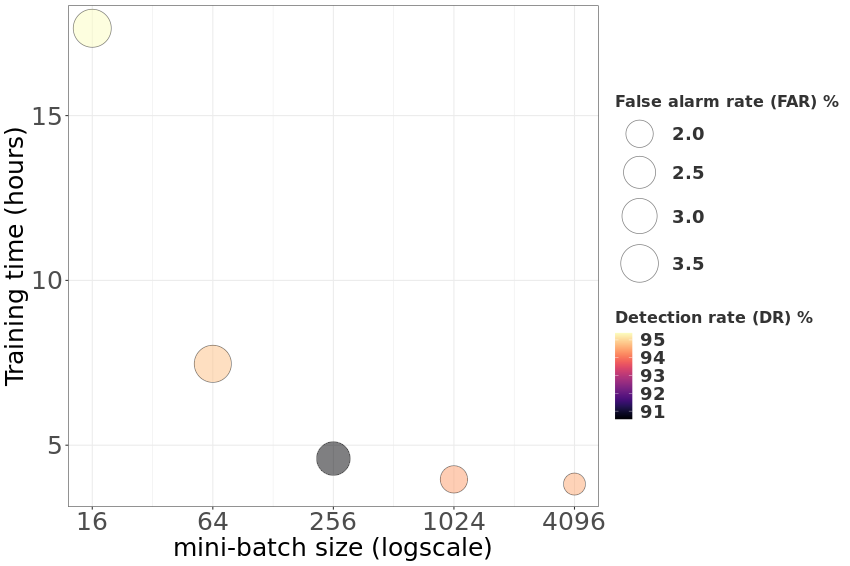

In [125]:
%%R -i df -i outfile  -w 30 -h 20 -u cm
library(ggsci) 
library(ggpubr)

p <- ggplot(data=df,aes(x=bs, y=inference_times, fill=dr, size=far)) +
    geom_point(alpha=0.5, shape=21, color="black") +
    scale_x_continuous(trans = 'log2',breaks=c(16,64,256,1024,4096), labels=c('16','64','256','1024','4096'))+
    scale_size_continuous(range=c(2*5,3.5*5), name='False alarm rate (FAR) %' ) +
    scale_fill_viridis(discrete=FALSE, name="Detection rate (DR) %",  option="A") +
    ylab("Training time (hours)") +
    xlab("mini-batch size (logscale)")+
    theme_bw()+
    theme(
        #panel.grid.major.y = element_line(size=0.25, linetype='solid', color='grey'),
        panel.grid.minor.y = element_line(size=0.01, linetype='solid'),
        legend.title=element_text(colour="grey20", size=16, angle=0, hjust=.0, face='bold'),
        legend.text=element_text(colour="grey20", size=18, angle=0, hjust=.0, face='bold'),
        strip.text = element_text(size=25),
         axis.title = element_text(size=25),
        axis.text = element_text(size=25),
         )
    

print(p)
ggsave(paste('./',outfile, '.eps', sep=''), plot=p, width=60, height=30, units='cm')
ggsave(paste('./',outfile, '.png', sep=''), p, width=30, height=20, units='cm', dpi=500)
#png(filename = paste('./',outfile, '.png', sep=''),plot=p,  width=60, height=30, units='cm', res=1200)   